kết nối đến drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tải thư viện


In [ ]:
!pip install ultralytics
!pip install roboflow

import thư viện

In [3]:
import torch
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import os

# Đường dẫn chính xác đến tệp data.yaml
data_yaml_path = "/content/drive/MyDrive/5_loai_qua.yolov8/data.yaml"

# Kiểm tra xem file có tồn tại không
if os.path.exists(data_yaml_path):
    with open(data_yaml_path, "r") as f:
        data = f.read()

    # Cập nhật đường dẫn tuyệt đối theo thư mục "5Qua"
    data = data.replace("train: train", f"train: /content/drive/MyDrive/5_loai_qua.yolov8/train")
    data = data.replace("val: valid", f"val: /content/drive/MyDrive/5_loai_qua.yolov8/valid")
    data = data.replace("test: test", f"test: /content/drive/MyDrive/5_loai_qua.yolov8/test")  # Đảm bảo đúng đường dẫn

    # Ghi đè tệp `data.yaml`
    with open(data_yaml_path, "w") as f:
        f.write(data)

    print("✅ Đã cập nhật đường dẫn `train`, `valid`, `test` theo thư mục '5Qua' thành công!")
else:
    print(f"⚠️ Không tìm thấy tệp `{data_yaml_path}`, vui lòng kiểm tra lại đường dẫn!")

✅ Đã cập nhật đường dẫn `train`, `valid`, `test` theo thư mục '5Qua' thành công!


In [ ]:
from ultralytics import YOLO

# Load mô hình YOLOv8
model = YOLO("yolov8n.pt")  # Dùng mô hình YOLOv8 nhỏ (nano)

# Huấn luyện mô hình với dataset trong thư mục "5Qua"
model.train(data="/content/drive/MyDrive/5_loai_qua.yolov8/data.yaml",
            epochs=20,  # Số vòng lặp huấn luyện (có thể tăng lên nếu cần)
            imgsz=640,  # Kích thước ảnh
            batch=8,  # Batch size
            device="cuda")  # Sử dụng GPU nếu có


0: 640x640 1 Le, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


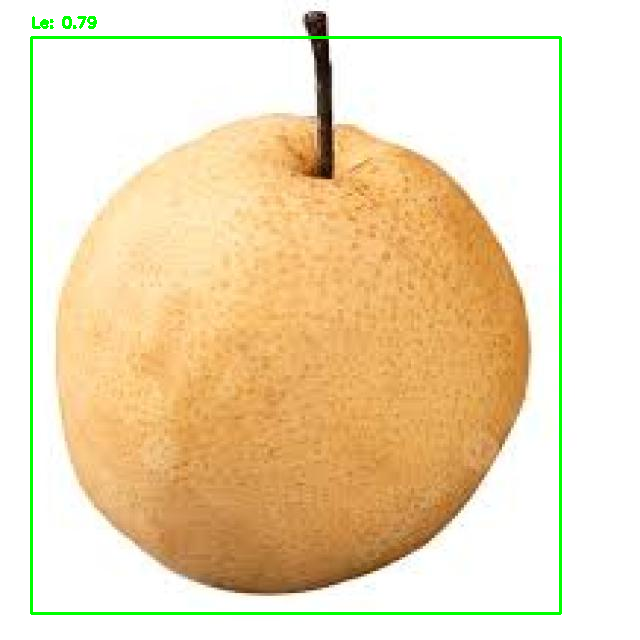

In [6]:
img = cv2.imread("/content/drive/MyDrive/5_loai_qua.yolov8/test/images/le1_jpg.rf.dac4399bb49526225b58eb21e32c0810.jpg")
results = model(img)
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = f"{r.names[int(box.cls)]}: {box.conf[0]:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
cv2_imshow(img)

In [7]:
import cv2
import torch
import tkinter as tk
from tkinter import filedialog
from ultralytics import YOLO

# Load mô hình YOLO đã train
model = YOLO(r"/content/runs/detect/train/weights/best.pt")


In [ ]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>